<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [2]:
!pip install pandas
!pip install openpyxl 
!pip install sklearn

     |████████████████████████████████| 9.9 MB 3.8 MB/s eta 0:00:01
     |████████████████████████████████| 15.3 MB 54.4 MB/s eta 0:00:01��███▍        | 11.2 MB 54.4 MB/s eta 0:00:01


In [24]:
!pip install matplotlib

     |████████████████████████████████| 11.5 MB 4.8 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 52.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 4.4 MB/s eta 0:00:01


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
X = pd.read_excel("autos_acp_excel.xlsx",sheet_name="data",header=0,index_col=0)

In [4]:
#dimension 
print(X.shape) # (18, 6) 
#nombre d'observations 
n = X.shape[0] #nombre de variables 
p = X.shape[1] #affichage des données 
print(X)

(18, 6)
                  CYL  PUISS  LONG  LARG  POIDS  V.MAX
Modele                                                
Alfasud TI       1350     79   393   161    870    165
Audi 100         1588     85   468   177   1110    160
Simca 1300       1294     68   424   168   1050    152
Citroen GS Club  1222     59   412   161    930    151
Fiat 132         1585     98   439   164   1105    165
Lancia Beta      1297     82   429   169   1080    160
Peugeot 504      1796     79   449   169   1160    154
Renault 16 TL    1565     55   424   163   1010    140
Renault 30       2664    128   452   173   1320    180
Toyota Corolla   1166     55   399   157    815    140
Alfetta 1.66     1570    109   428   162   1060    175
Princess 1800    1798     82   445   172   1160    158
Datsun 200L      1998    115   469   169   1370    160
Taunus 2000      1993     98   438   170   1080    167
Rancho           1442     80   431   166   1129    144
Mazda 9295       1769     83   440   165   1095    165
Op

In [7]:
#classe pour standardisation 
from sklearn.preprocessing import StandardScaler 
#instanciation 
sc = StandardScaler() 
#transformation – centrage-réduction 
Z = sc.fit_transform(X)
print(Z)

[[-0.77509889 -0.28335818 -1.88508077 -1.09734528 -1.56900676  0.56976043]
 [-0.12016326  0.01963869  1.60580955  2.0010414   0.23416142  0.14597168]
 [-0.92920139 -0.83885242 -0.44217944  0.25819889 -0.21663062 -0.53209032]
 [-1.12733318 -1.29334771 -1.00072189 -1.09734528 -1.11821472 -0.61684807]
 [-0.12841875  0.67613189  0.25599862 -0.51639778  0.19659542  0.56976043]
 [-0.9209459  -0.13185975 -0.20945342  0.45184806  0.0087654   0.14597168]
 [ 0.45221746 -0.28335818  0.72145067  0.45184806  0.60982146 -0.36257482]
 [-0.18345536 -1.49534562 -0.44217944 -0.71004695 -0.51715865 -1.54918332]
 [ 2.84080623  2.19111619  0.86108628  1.22644473  1.81193359  1.84112668]
 [-1.28143568 -1.49534562 -1.60580955 -1.87194195 -1.98223281 -1.54918332]
 [-0.16969621  1.23162613 -0.25599862 -0.90369611 -0.14149861  1.41733793]
 [ 0.45772112 -0.13185975  0.53526985  1.03279556  0.60982146 -0.02354382]
 [ 1.0080872   1.53462299  1.65235475  0.45184806  2.18759363  0.14597168]
 [ 0.99432805  0.67613189

In [11]:
print(np.mean(Z,axis=0))
#écart-type 
print('écart-type',np.std(Z,axis=0,ddof=0))

[-2.22044605e-16 -1.41861831e-16  0.00000000e+00  1.86270752e-15
  5.73615229e-16  5.55111512e-16]
écart-type [1. 1. 1. 1. 1. 1.]


In [13]:
from sklearn.decomposition import PCA 

individu_contrib = np.sum(X**2,axis=1)
acp = PCA(svd_solver='full')

print('ACP',acp)


ACP PCA(svd_solver='full')


PCA(svd_solver='full')

In [16]:
coord = acp.fit_transform(Z)
print('n_components_ = ',acp.n_components_)

n_components_ =  6


In [23]:
eigval = (n-1)/n*acp.explained_variance_ 
print('variance expliquée =',eigval)
print('via singular =',acp.singular_values_**2/n)

#proportion de variance expliquée 
print('proportion de variance expliquée : ',acp.explained_variance_ratio_.round(4))

variance expliquée = [4.42085806 0.85606229 0.37306608 0.21392209 0.09280121 0.04329027]
via singular = [4.42085806 0.85606229 0.37306608 0.21392209 0.09280121 0.04329027]
proportion de variance expliquée :  [0.7368 0.1427 0.0622 0.0357 0.0155 0.0072]


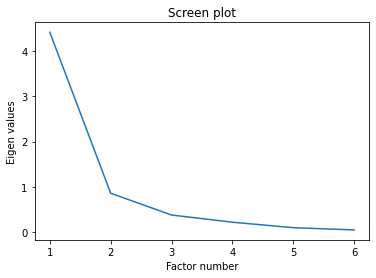

In [31]:
#scree plot 
plt.plot(np.arange(1,p+1),eigval) 
plt.title("Screen plot") 
plt.ylabel("Eigen values") 
plt.xlabel("Factor number") 
plt.show()

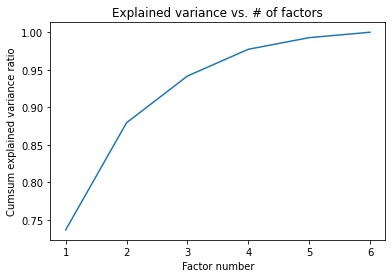

In [34]:
#cumul de variance expliquée 
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_)) 
plt.title("Explained variance vs. # of factors") 
plt.ylabel("Cumsum explained variance ratio") 
plt.xlabel("Factor number") 
plt.show()

In [36]:
#seuils pour test des bâtons brisés 
bs = 1/np.arange(p,0,-1) 
bs = np.cumsum(bs) 
bs = bs[::-1]

In [38]:
#test des bâtons brisés 
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bs}))

   Val.Propre    Seuils
0    4.420858  2.450000
1    0.856062  1.450000
2    0.373066  0.950000
3    0.213922  0.616667
4    0.092801  0.366667
5    0.043290  0.166667


In [ ]:
cos2 = coord**2 
for j in range(acp.n_components_):
    cos2[:,j] = cos2[:,j]/individu_contrib
print("les COS2 pour les deux premiers Facteurs: ")
print("   Cosinus carré : qualité de représentation de la variable sur les composantes _1 et _2.")


In [14]:
# contrib_individus.sort_values(by='individu_contrib',inplace=True,ascending=False)

print("\n Individus bien représentés par Facteur 1")
print(pd.DataFrame({'id':X.index,'COS2_1':cos2[:,0]}).sort_values(by='COS2_1',ascending=False).head(5))

print("\n Individus mal représentés par Facteur 1")
print(pd.DataFrame({'id':X.index,'COS2_1':cos2[:,0]}).sort_values(by='COS2_1',ascending=True).head(5))

print("\n Individus bien représentés par Facteur 2")
print(pd.DataFrame({'id':X.index,'COS2_2':cos2[:,1]}).sort_values(by='COS2_2',ascending=False).head(5))

print("\n Individus mal représentés par Facteur 2")
print(pd.DataFrame({'id':X.index,'COS2_2':cos2[:,1]}).sort_values(by='COS2_2',ascending=True).head(5))



 Individus bien représentés par Facteur 1
                 id    COS2_1
9    Toyota Corolla  0.123258
8        Renault 30  0.122907
3   Citroen GS Club  0.073857
17        Lada 1300  0.046470
0        Alfasud TI  0.039303

 Individus mal représentés par Facteur 1
               id    COS2_1
1        Audi 100  0.000240
4        Fiat 132  0.000326
10   Alfetta 1.66  0.001042
7   Renault 16 TL  0.001984
15     Mazda 9295  0.004045

 Individus bien représentés par Facteur 2
                id    COS2_2
9   Toyota Corolla  0.006251
0       Alfasud TI  0.005180
12     Datsun 200L  0.004887
5      Lancia Beta  0.003162
14          Rancho  0.002949

 Individus mal représentés par Facteur 2
               id        COS2_2
10   Alfetta 1.66  2.262317e-08
15     Mazda 9295  1.310343e-04
17      Lada 1300  1.738447e-04
11  Princess 1800  1.774012e-04
6     Peugeot 504  1.897075e-04


In [15]:
# vérifions la théorie - somme en ligne des cos2 = 1
verfif_cos_1 = np.sum(cos2,axis=1)
if np.all ((verfif_cos_1.round(1) == 1.0 )) :
    print('ok - somme des % = 1')
else:
    print("\x1b[31m ko - somme des % differt de 1 \x1b[0m")
    print(verfif_cos_1)

 ko - somme des % differt de 1 
[0.04464231 0.00103499 0.03825767 0.07409755 0.00078309 0.03621702
 0.00701441 0.00283835 0.12350051 0.12955825 0.0013238  0.00711544
 0.03592613 0.02424633 0.01077268 0.00419229 0.02265097 0.04674077]
